### 📦 Import Libraries and Read the Data

- Load essential libraries for data analysis and visualization
- Set global plot styles and figure size
- Read in the movie dataset (`movies.csv`)

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) # Set default size of plots 

# Read in the data 
df = pd.read_csv(r"C:\Users\MSI\Downloads\movies.csv")

### 👀 First Look at the Data

Preview the first few rows of the dataset using `df.head()`.


In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### 🔍 Check for Missing Data

Loop through each column and print the percentage of missing value.


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df.dropna(inplace=True) # Drop all rows with missing values

### 🧬 Check Column Data Types

Inspect the data types of each column to understand what kind of values you're workinwith
.


In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### 🔧 Convert Data Types

Convert numerical columns (`budget`, `gross`, `votes`, `runtime`) to 64-bit integers for consistency and accurate analysis.


In [6]:
df = df.astype({
    "budget": "int64",
    "gross": "int64",
    "votes": "int64",
    "runtime": "int64"
})

### 🤔 Assumption About Year Column

It's unclear whether the `year` column refers to the actual **production year** or the **release year**.

For this analysis, we'll **assume that `year` should match the year extracted from the `released` column**.


### 🧪 Validate Year Consistency Between `year` and `released`

To ensure data integrity, we check whether the `year` column matches the actual release year extracted from the `released` column.

- Extract the year portion from the `released` string using regex
- Convert both columns to numeric
- Compare and display mismatches (if any)


In [7]:
df["released_year"] = df['released'].str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
mismatched_entries = df[df['year'] != df['released_year']][["name", "year", "released"]]
# print(mismatched_entries)
mismatched_entries.head()

,name,year,released
8,Superman II,1980,"June 19, 1981 (United States)"
11,The Gods Must Be Crazy,1980,"October 26, 1984 (United States)"
21,Heaven's Gate,1980,"April 24, 1981 (United States)"
33,Cattle Annie and Little Britches,1980,"April 24, 1981 (United States)"
96,The Evil Dead,1981,"April 15, 1983 (United States)"


### 🛠️ Create a Corrected Year Column

Extract the release year from the `released` column and store it in a new column called `yearcorrect`.

This helps standardize the year information for future analysis.


In [8]:
df["yearcorrect"] = df["released"].astype(str).str.extract(r'(\d{4})')

In [9]:
df.sort_values(by=["gross"], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018,2018


In [10]:
# Uncomment to display all entries

# pd.set_option("display.max_rows", None)

### 🧹 Remove Duplicate Rows

Drop any duplicate rows in the dataset to ensure uniqueness.


In [11]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980


### 💡 Hypothesis: What Influences Gross Revenue?

We expect that the following features may have a **high positive correlation** with a movie's gross revenue:

- 🎬 **Budget** — larger budgets might lead to higher production quality, better actors, and more marketing
- 🏢 **Company** — major production studios may have more resources to ensure financial success


### 📉 Scatter Plot: Budget vs Gross Earnings

Plot a scatter chart to visually explore the relationship between a movie's **budget** and its **gross earnings**.

We expect to see a positive correlation: movies with higher budgets tend to earn more.


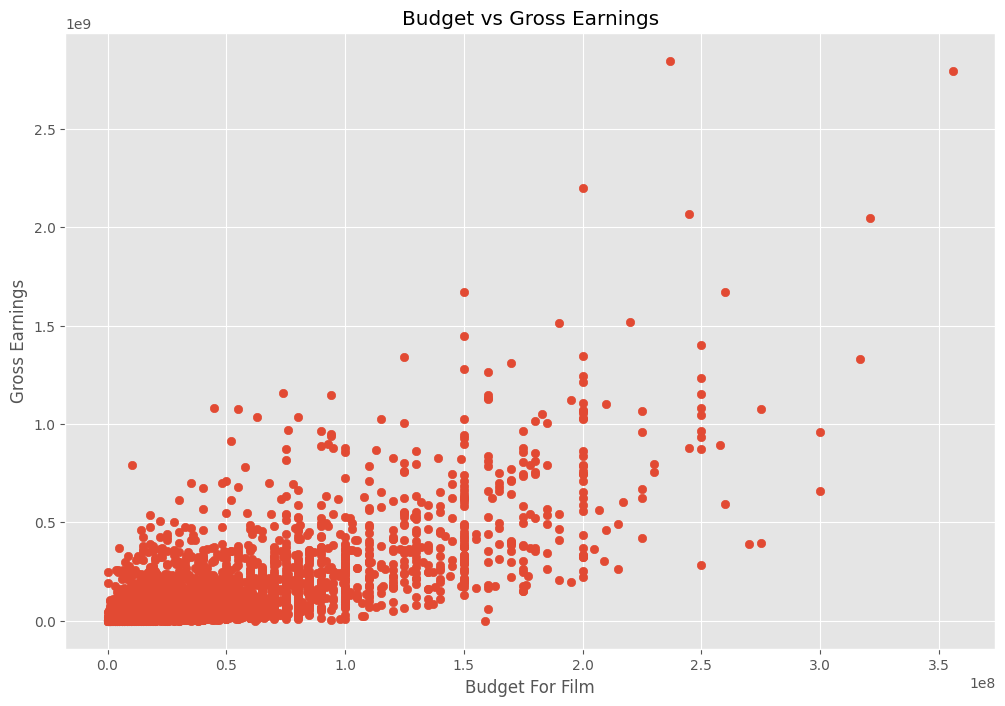

In [12]:
plt.scatter(x=df["budget"], y=df["gross"])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget For Film")
plt.ylabel("Gross Earnings")
plt.show()

### 📊 Seaborn Regression Plot: Budget vs Gross

Enhance the scatter plot using Seaborn's `regplot()` to add a **linear regression line**.

This helps us visually assess the **strength and direction of correlation** between a movie’s budget and gross earnings.


<Axes: xlabel='budget', ylabel='gross'>

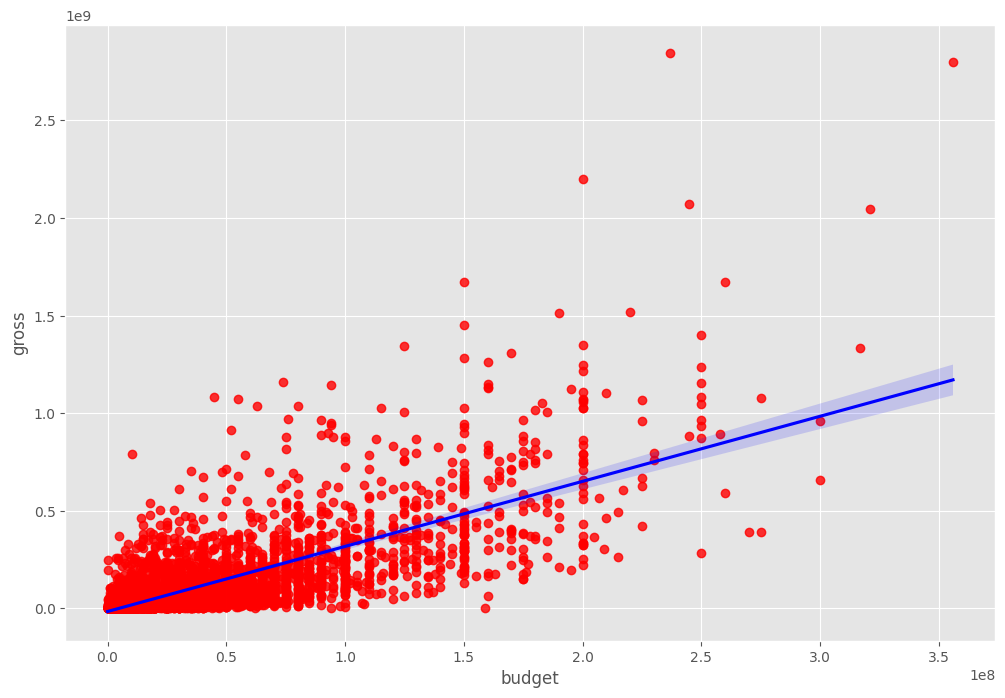

In [13]:
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

### 📈 Begin Correlation Analysis

Now that we've visually explored some relationships, let's start calculating **correlation coefficients** between numerical features to quantify their relationships with `gross` revenue.


In [14]:
df.corr(numeric_only=True) 

,year,score,votes,budget,gross,runtime,released_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
released_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [15]:
df.corr(numeric_only=True, method="spearman")

,year,score,votes,budget,gross,runtime,released_year
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444,0.998694
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155,0.063674
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621,0.422988
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794,0.302535
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400,0.340529
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000,0.095507
released_year,0.998694,0.063674,0.422988,0.302535,0.340529,0.095507,1.000000


### ✅ Observation: High Correlation Between Budget and Gross

As expected, there's a **strong positive correlation** between a movie’s **budget** and its **gross earnings**.

This supports our initial hypothesis and is visible in both the scatter plot and the correlation matrix.


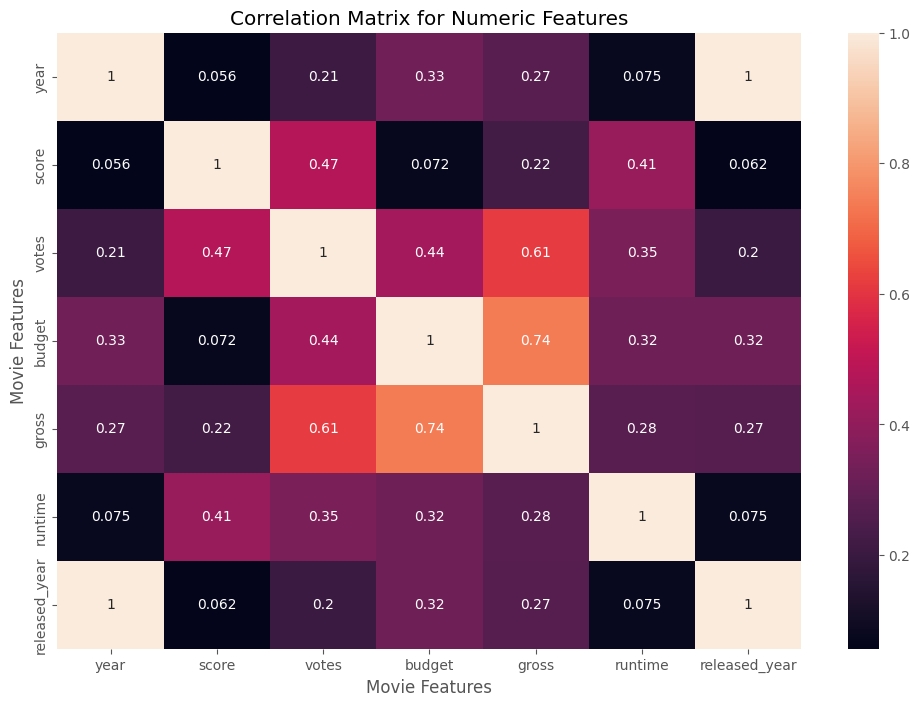

In [16]:
correlation_matrix = df.corr(method="pearson", numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

### 🏢 Investigate the Impact of Production Company

Now let's explore whether the **company that produced the movie** has a noticeable influence on its **gross earnings**.

We'll analyze and visualize any potential correlation or trend involving the `company` feature.


In [17]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes


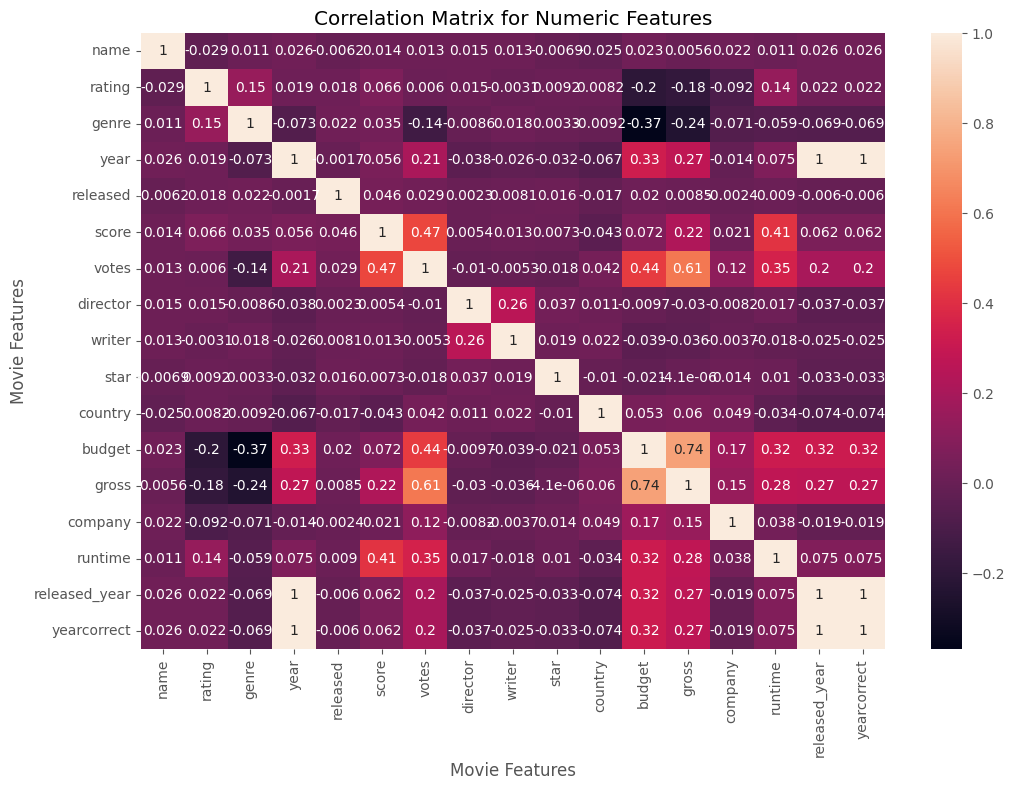

In [18]:
correlation_matrix = df_numerized.corr(method="pearson", numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [19]:
df_numerized.corr(numeric_only=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687,-0.032687


In [20]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029234
      genre       0.010996
      year        0.025542
      released   -0.006152
dtype: float64

In [21]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

budget  genre    -0.368523
genre   budget   -0.368523
gross   genre    -0.244101
genre   gross    -0.244101
budget  rating   -0.203946
dtype: float64

In [22]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1) ]
high_corr

gross          votes            0.614751
votes          gross            0.614751
gross          budget           0.740247
budget         gross            0.740247
year           yearcorrect      0.998726
yearcorrect    year             0.998726
year           released_year    0.998726
released_year  year             0.998726
dtype: float64

### 📌 Correlation Summary

- ✅ **Votes** and **Budget** show the **strongest positive correlation** with Gross Earnings.
- ⚠️ **Company** appears to have a **weak correlation** with Gross Earnings, despite initial expectations.


### 🎬 Does Genre Influence Gross Revenue?

Now let's explore whether a movie’s **genre** has an impact on its **gross revenue**.

We'll group the data by genre and analyze the average gross earnings across different genres.


In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980,1980


### 📊 Calculate Average Gross Revenue per Genre

Group the dataset by genre and compute the **average gross earnings** for each genre.  
We'll divide the result by 1,000,000 to express values in **millions of USD**.


In [24]:
# Compute average gross per genre (in millions USD)
genre_gross = df.groupby('genre')['gross'].mean().sort_values(ascending=False) / 1_000_000

### 🧾 Format the Grouped Data

Reset the index and rename columns to create a clean DataFrame (`genre_df`)  
with two columns: `genre` and `avg_gross_million`.


In [25]:
# Prepare DataFrame for plotting
genre_df = genre_gross.reset_index()
genre_df.columns = ['genre', 'avg_gross_million']

### 📊 Visualize Average Gross Revenue by Genre

Plot a bar chart showing the **average gross revenue (in millions)** for each movie genre.  
This helps visualize which genres tend to generate more revenue on average.


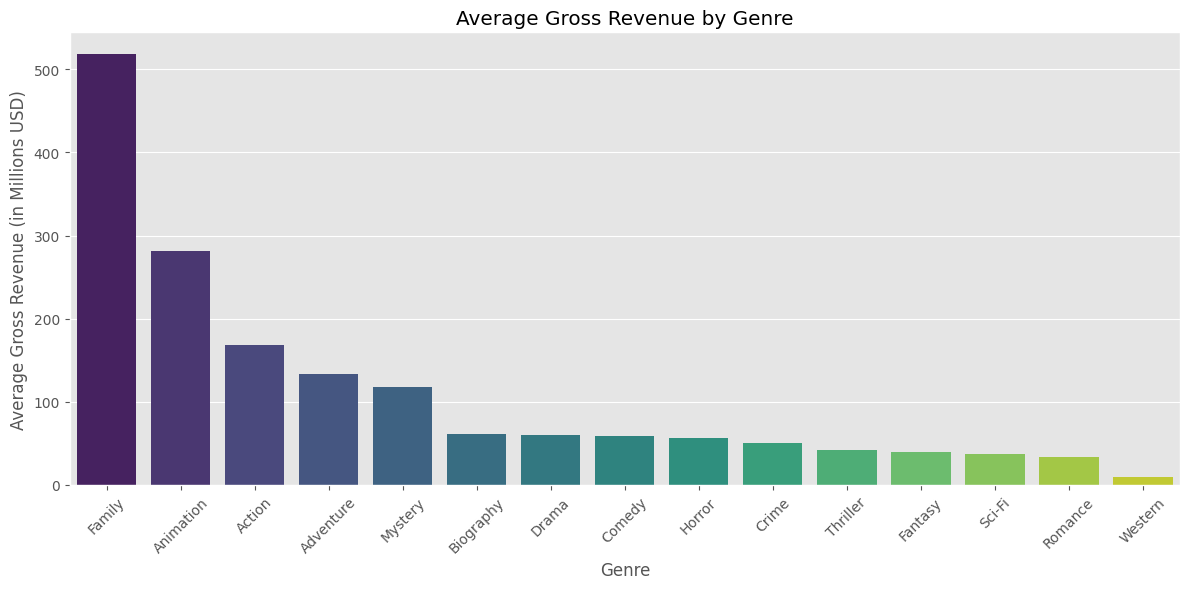

In [26]:
# Plot (no ticker, just raw values in millions)
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df, x='genre', y='avg_gross_million', hue='genre', palette='viridis', dodge=False, legend=False)

# Axis labels
plt.title("Average Gross Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Gross Revenue (in Millions USD)")

# Rotate x labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 💰 What Are the Top 10 Most Profitable Movies?

### 📊 Calculate Profit and ROI for Each Movie

Now we'll create two new columns:

- `profit`: the difference between gross earnings and budget  
- `ROI` (Return on Investment): profit divided by budget

This helps identify not just big earners, but **high-efficiency films** that made a lot with very little.


In [27]:
# Add profit and ROI columns
df['profit'] = df['gross'] - df['budget']
df['ROI'] = df['profit'] / df['budget']

In [28]:
# Top 10 by ROI
top_roi = df.sort_values(by='ROI', ascending=False)[['name', 'budget', 'gross', 'ROI']].head(10)
print(top_roi)

                         name  budget      gross           ROI
5114      Paranormal Activity   15000  193355800  12889.386667
3459  The Blair Witch Project   60000  248639099   4142.984983
6815              The Gallows  100000   42964410    428.644100
2093              El Mariachi    7000    2040920    290.560000
5154                     Once  150000   20936722    138.578147
2467                   Clerks   27000    3151130    115.708519
4471        Napoleon Dynamite  400000   46138887    114.347217
3233    In the Company of Men   25000    2804473    111.178920
4814              Keeping Mum  169000   18586834    108.981266
4304               Open Water  500000   54683487    108.366974


### ⏱️ Do Longer Movies Earn More?

Let’s test the hypothesis that **movies with longer runtimes** tend to **earn more at the box office**.

We'll calculate the correlation between `runtime` and `gross`.


In [29]:
runtime_corr = df['runtime'].corr(df['gross'])
print(f"Correlation between runtime and gross earnings: {runtime_corr:.2f}")

Correlation between runtime and gross earnings: 0.28


### 📉 Skewness and Log Transformation

- **Skewness** describes the **asymmetry** in a data distribution.
- In this dataset, both `budget` and `gross` are **right-skewed**, meaning:
  - Most values are small
  - A few massive outliers create a **long right tail**
- This skewness can distort plots and affect correlation/regression analysis.

---

#### ✅ Solution: Log Transformation

We'll apply a **logarithmic transformation** to `budget` and `gross` using `np.log1p()`  
This will:
- Compress large values
- Spread out small ones
- Make trends easier to visualize


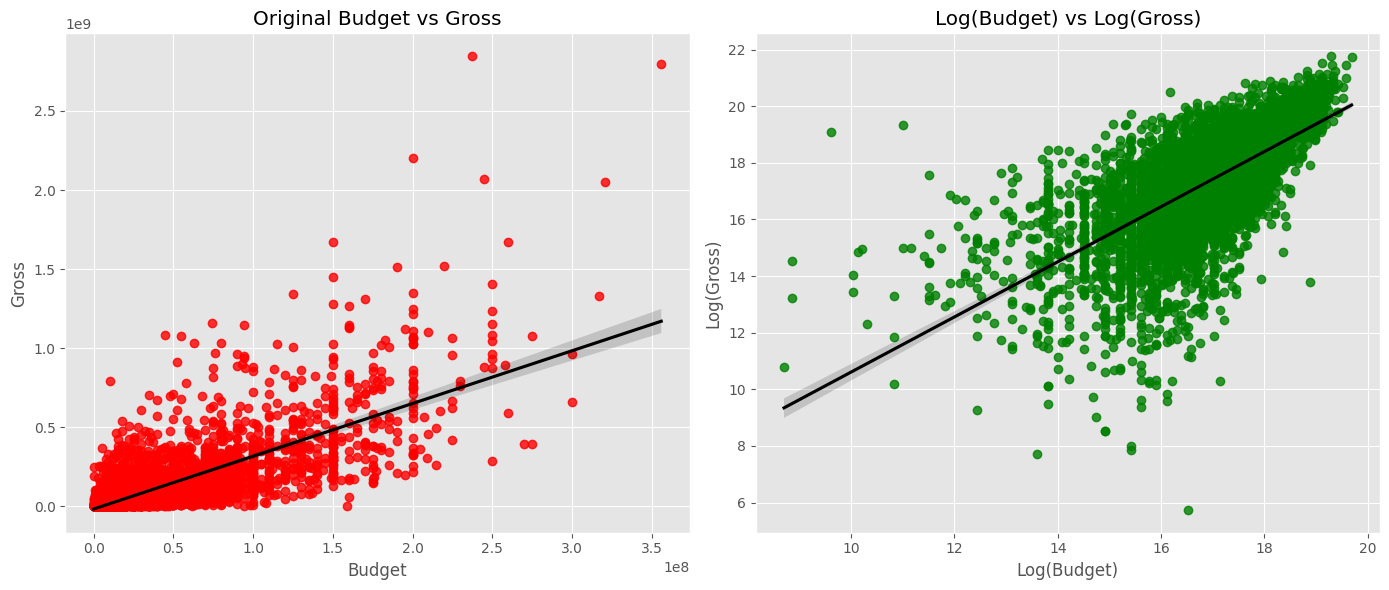

In [30]:
# Log Transformation to deal with skewness
df_log = df.copy()
df_log['log_gross'] = np.log1p(df_log['gross'])
df_log['log_budget'] = np.log1p(df_log['budget'])

# Compare original vs log-transformed plots side by side
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original: Budget vs Gross
sns.regplot(
    x='budget',
    y='gross',
    data=df,
    scatter_kws={"color": "red"},
    line_kws={"color": "black"},
    ax=axes[0]
)
axes[0].set_title("Original Budget vs Gross")
axes[0].set_xlabel("Budget")
axes[0].set_ylabel("Gross")

# Log-transformed: Log(Budget) vs Log(Gross)
sns.regplot(
    x='log_budget',
    y='log_gross',
    data=df_log,
    scatter_kws={"color": "green"},
    line_kws={"color": "black"},
    ax=axes[1]
)
axes[1].set_title("Log(Budget) vs Log(Gross)")
axes[1].set_xlabel("Log(Budget)")
axes[1].set_ylabel("Log(Gross)")

plt.tight_layout()
plt.show()
